# Decision Tree

A Decision Tree is a supervised machine learning algorithm that is used for both classification and regression tasks. It is one of the simplest and most interpretable models, making it highly popular for tasks where explainability is important.

# 1. What is a Decision Tree?

A Decision Tree is a flowchart-like structure where:

Each internal node represents a "test" or "decision" on a feature (e.g., whether a feature is greater than a certain threshold).
Each branch represents the outcome of the test.
Each leaf node represents a class label (for classification) or a continuous value (for regression).

The tree is built by splitting the data into subsets based on the features that result in the most homogeneous subsets, i.e., the most "pure" groups.

# 2. How Does a Decision Tree Work?

The training process of a decision tree involves selecting the feature that best splits the data at each node, then recursively repeating this process for each branch until the tree reaches a stopping condition (e.g., when all data points in a branch belong to the same class, or when the maximum depth of the tree is reached).

**Key Concepts**:

**Root Node**: The topmost node of the tree, representing the entire dataset.
    
**Splitting**: The process of dividing the dataset into subsets based on a feature.
    
**Leaf Nodes**: The final nodes, which represent the output or prediction.
    
**Branches**: These are the decision paths that connect nodes.

# 3. How to Choose the Best Split?


To build a decision tree, we must decide on which feature to split the data at each step. There are two popular criteria used to evaluate the best split:

**Gini Impurity**: This is the most common criterion used in decision trees (especially for classification problems). It measures the "impurity" of a node. 

  **Gini(p)=1−sum(pi)^2 from i=1 to k**

**Entropy (Information Gain)**: Another commonly used criterion, especially in ID3 and C4.5 decision tree algorithms. It measures the amount of disorder or impurity in a node. 

  **Entropy(S)=-SUM(pi log2(pi) from i=1 to k**

The goal is to maximize information gain, which is defined as the difference between the entropy before and after the split.

# 4. Advantages of Decision Tree

**Interpretability**: Decision Trees are easy to understand and interpret, as they mimic human decision-making.

**Non-linear Relationships**: They are capable of handling both linear and non-linear relationships.

**Handling Missing Data**: They can handle missing values effectively by using surrogate splits.

**No Need for Feature Scaling**: Unlike many other algorithms, Decision Trees don’t require normalization or standardization of the features.

# 5. Disadvantages of Decision Trees

**Overfitting**: Decision Trees are prone to overfitting, especially when the tree is deep and the data is noisy. This means they may fit the training data very well but perform poorly on unseen data.

**Instability**: Small changes in the data can lead to large changes in the structure of the tree.

**Bias toward Features with More Levels**: Decision Trees can favor features with more possible values, although this can be addressed with techniques like pruning or feature selection.

# 6. Pruning (To Avoid Overfitting)

Pruning is the process of cutting back the tree after it’s been built to prevent overfitting. This can be done in two ways:

**Pre-pruning**: Stopping the tree from growing too deep or when the node doesn’t meet a minimum threshold of purity.

**Post-pruning**: Allowing the tree to grow fully and then trimming it by removing nodes that add little predictive power.

# 7. Applications of Decision Trees

Decision Trees are used in a wide variety of fields, including:

**Medical Diagnosis**: To predict the likelihood of a disease based on features such as age, symptoms, and test results.

**Finance**: For credit scoring or predicting loan defaults.

**Marketing**: To predict customer behavior, such as whether they will buy a product.

**Fraud Detection**: To detect fraud in transactions by classifying them as legitimate or fraudulent.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc

In [3]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#  Exploraratory Data Analysis(EDA)

In [8]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [11]:
df.shape

(400, 5)

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [4]:
print(df.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


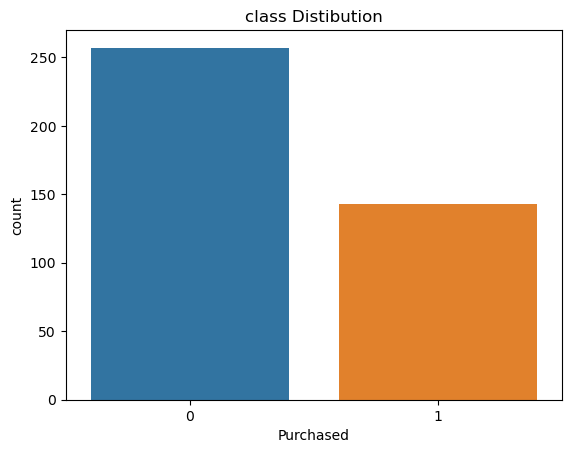

In [6]:
sns.countplot(x=df['Purchased'])
plt.title("class Distibution")
plt.show()

In [13]:
X=df.iloc[:,2:4].values
y=df.iloc[:,-1].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [15]:
y_pred=classifier.predict(X_test)
print(y_pred)

[1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0
 1 0 1 1 0 0]


<Axes: >

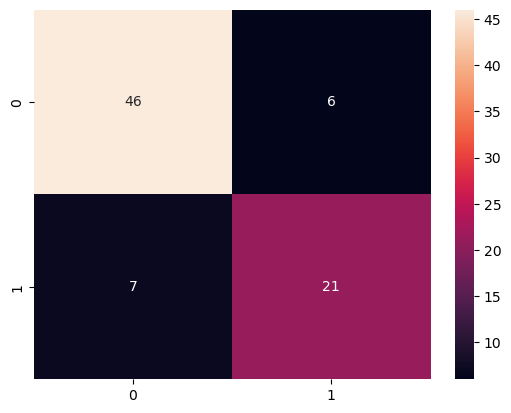

In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [19]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracyof the model:",accuracy)

Accuracyof the model: 0.8375
